# Handwritten Digit Classification with CNN + Data Augmentation

This notebook trains a CNN on the MNIST dataset using data augmentation
and compares performance to a non-augmented baseline.

Steps:
1. Loads MNIST
2. Shows sample digits
3. Trains a baseline CNN (no augmentation)
4. Trains an augmented CNN
5. Compares accuracy & loss
6. Shows confusion matrices
7. Shows predictions side-by-side
8. Prints classification reports


Imports:

In [13]:
import os
import sys

repo_name = "handwritten-digit-classifier-augmentation"
if not os.path.exists(repo_name):
    !git clone https://github.com/BeneNat/handwritten-digit-classifier-augmentation.git

os.chdir(repo_name)
!pip install -r requirements.txt
sys.path.append(os.getcwd())

import numpy as np
import matplotlib.pyplot as plt
from src.data import load_data
from src.train import train, train_no_augmentation
from src.evaluate import (
  plot_accuracy_comparison,
  plot_loss_comparison,
  plot_confusion_matrix_single,
  plot_confusion_matrices_side_by_side,
  show_example_predictions,
  print_classification_report,
  show_image_grid,
)

ERROR: Could not find a version that satisfies the requirement tensorflow==2.15.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.15.0


# 1. Load MNIST
---
This section loads MNIST and shows a grid of sample images.

In [14]:
x_train, y_train, x_test, y_test = load_data()
print("Shapes:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

Shapes:
x_train: (60000, 28, 28, 1)
y_train: (60000, 10)
x_test: (10000, 28, 28, 1)
y_test: (10000, 10)


Show sample digits:

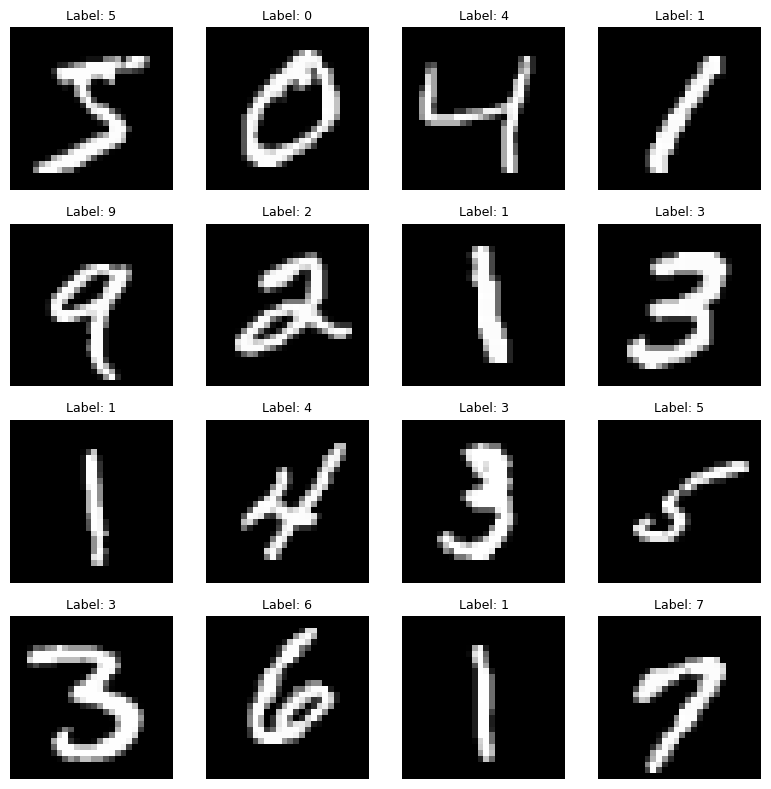

In [15]:
show_image_grid(x_train[:16], labels=np.argmax(y_train[:16], axis=1))

# 2. Train Model WITHOUT augmentation
---
This is our baseline model (to compare augumented model against)

In [ ]:
history_no_aug, model_no_aug = train_no_augmentation(epochs=5, batch_size=25)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 85s 34ms/step - accuracy: 0.9306 - loss: 0.2280 - val_accuracy: 0.9856 - val_loss: 0.0421
Epoch 2/5
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9883 - loss: 0.0372 - val_accuracy: 0.9867 - val_loss: 0.0373
Epoch 3/5
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9930 - loss: 0.0219 - val_accuracy: 0.9891 - val_loss: 0.0351
Epoch 4/5


# 3. Train Model WITH augmentation
---
This model uses rotation/shift/zoom to augement the data set

In [ ]:
history_aug, model_aug = train(epochs=5, batch_size=32)

# 4. Compare Accuracy & Loss
---
Side-by-side performance visualization

In [ ]:
plot_accuracy_comparison(history_no_aug, history_aug)
plot_loss_comparison(history_no_aug, history_aug)

# 5. Print Final Accuracies
---

In [ ]:
print("Final validation accuracy:")
print("No augmentation:", history_no_aug.history['val_accuracy'][-1])
print("With augmentation:", history_aug.history['val_accuracy'][-1])

# 6. Confusion Matrices
---

In [ ]:
plot_confusion_matrix_single(model_no_aug, x_test, y_test, title="Confusion Matrix — No Augmentation")
plot_confusion_matrix_single(model_aug, x_test, y_test, title="Confusion Matrix — With Augmentation")
plot_confusion_matrices_side_by_side(model_no_aug, model_aug, x_test, y_test)

# 7. Classification Reports
---

In [ ]:
print("\nBASELINE MODEL REPORT")
print_classification_report(model_no_aug, x_test, y_test)

print("\nAUGMENTED MODEL REPORT")
print_classification_report(model_aug, x_test, y_test)

# 8. Example Predictions
---
Compare predictions from both models on a couple of random digits

In [ ]:
show_example_predictions(model_no_aug, model_aug, x_test, y_test, n=5)

# 9. Save Final Models

In [ ]:
model_no_aug.save("../results/models/cnn_no_aug_final.keras")
model_aug.save("../results/models/cnn_aug_final.keras")
print("Models saved.")